# Notebook to make GP Draws

In [1]:
%matplotlib inline  

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

import GPy

In [2]:
def setup_rc_params():
    fontsize = 10
    black = 'k'

    mpl.rcdefaults()  # Set to defaults

    mpl.rc('text', usetex=True)
    mpl.rcParams['font.size'] = fontsize
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'

    mpl.rcParams['axes.labelsize'] = fontsize
    mpl.rcParams['axes.edgecolor'] = black
    # mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.labelcolor'] = black
    mpl.rcParams['axes.linewidth']
    mpl.rcParams['axes.titlesize'] = fontsize

    mpl.rcParams['ytick.direction'] = 'in'
    mpl.rcParams['xtick.direction'] = 'in'
    mpl.rcParams['xtick.labelsize'] = fontsize
    mpl.rcParams['ytick.labelsize'] = fontsize
    mpl.rcParams['xtick.color'] = black
    mpl.rcParams['ytick.color'] = black
    mpl.rcParams['xtick.minor.size'] = 2.4
    mpl.rcParams['ytick.minor.size'] = 2.4

    mpl.rcParams['figure.titlesize'] = fontsize

    mpl.rcParams['legend.title_fontsize'] = fontsize
    mpl.rcParams['legend.fontsize'] = fontsize
    mpl.rcParams['legend.edgecolor'] = 'inherit'  # inherits from axes.edgecolor, to match
    mpl.rcParams['legend.facecolor'] = (1, 1, 1, 0.6)  # Set facecolor with its own alpha, so edgecolor is unaffected
    mpl.rcParams['legend.fancybox'] = True
    mpl.rcParams['legend.borderaxespad'] = 0.8
    mpl.rcParams['legend.framealpha'] = None  # Do not set overall alpha (affects edgecolor). Handled by facecolor above
    mpl.rcParams['patch.linewidth'] = 0.8  # This is for legend edgewidth, since it does not have its own option

    mpl.rcParams['hatch.linewidth'] = 0.5

    mpl.rc('savefig', transparent=False, bbox='tight', pad_inches=0.05, dpi=350, format='png')
    mpl.rcParams['figure.dpi'] = 150

In [3]:
setup_rc_params()

In [4]:
orders = np.array([0, 2, 3, 4])
color_list = ['Oranges', 'Greens', 'Blues', 'Reds', 'Purples', 'Greys']
cmaps = [plt.get_cmap(name) for name in color_list[:len(orders)]]
colors = [cmap(0.63 - 0.1 * (i == 0)) for i, cmap in enumerate(cmaps)]

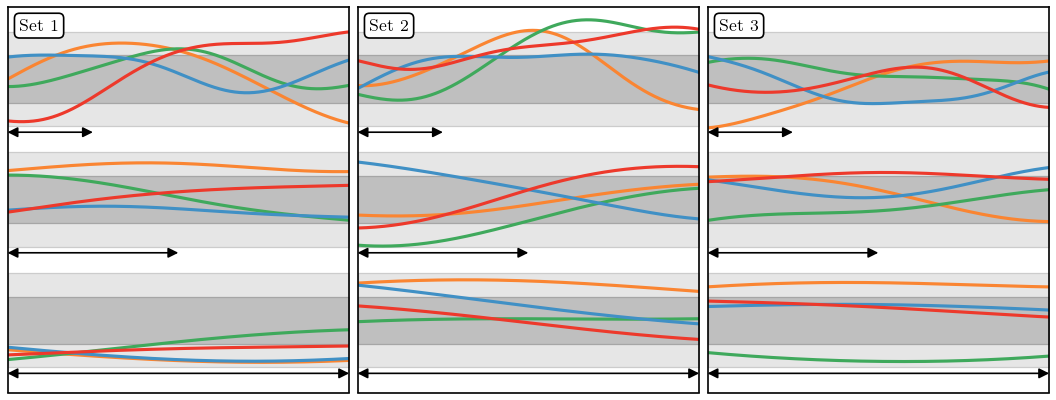

In [5]:
color_68 = '0.75'   # color for 1 sigma bands
color_95 = '0.9'  # color for 2 sigma bands

xmin = 0.; xmax = 1.
n_pts = 500
X = np.linspace(xmin, xmax, n_pts) # n_pts points evenly spaced over [xmin,xmax]
X = X[:,None] # reshape X to make it n*D
mu = np.zeros((n_pts)) # vector of the means
std = 1.

ls_list = [0.25, 0.5, 1.0]

fig, axes = plt.subplots(1, 3, figsize=(7, 2.6), sharey=True, sharex=True, constrained_layout=True) 
for i, lengthscale in enumerate(ls_list):
    k = GPy.kern.RBF(input_dim=1, lengthscale=lengthscale)
    C = k.K(X,X) # covariance matrix

    y_offset_i = - 5.1 * i
    for num in range(3):
        ax = axes[num]
        
        np.random.seed(3*num+i+348)

        Z = np.random.multivariate_normal(mu,C,4)
        ax.fill_between(
            X.flatten(),
            mu.flatten() + 2*std + y_offset_i,
            mu.flatten() - 2*std + y_offset_i,
            facecolor=color_95, edgecolor='0.8', lw=0.6
        )
        ax.fill_between(
            X.flatten(),
            mu.flatten() + std + y_offset_i,
            mu.flatten() - std + y_offset_i,
            facecolor=color_68, edgecolor='0.65', lw=0.6
        )

        for j in range(4):
            ax.plot(X,Z[j] + y_offset_i, c=colors[j])

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(0, 1)
        if i == 1:
            ax.set_ylim(2.6 * y_offset_i, -0.6 * y_offset_i)
        if i == 0:
            ax.text(
                0.035, 0.97, f'Set {num+1}', ha='left', va='top',
                transform=ax.transAxes, fontdict=dict(fontsize=8),
                bbox=dict(boxstyle='round', facecolor='w'),
            )
        linewidth = 3

        ax.annotate(
            "", (lengthscale, -2.25 + y_offset_i), xytext=(0, -2.25 + y_offset_i),
            arrowprops=dict(arrowstyle="<|-|>", facecolor='k', shrinkA=0, shrinkB=0),
        )

fig.set_constrained_layout_pads(h_pad=1./72, w_pad=2/72, wspace=0)
fig.savefig('gp_draws_different_ls_combined.png', bbox_inches=0, dpi=400)